In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import seaborn as sns

In [2]:
ctp = pd.read_csv("data/tetrapeptide.csv") # cyclic tetrapeptide
cpp = pd.read_csv("data/pentapeptide.csv") # cyclic pentapeptide

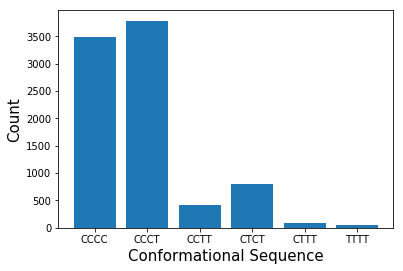

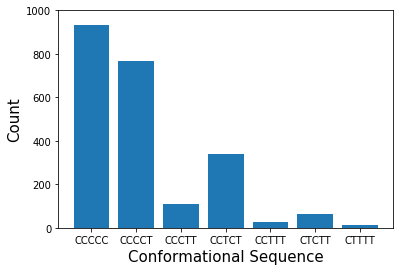

In [3]:
# Cyclic Tetrapeptide
ctseq, ctcounts = np.unique(ctp["CT"],return_counts=True)
plt.bar(ctseq,ctcounts)
plt.xlabel("Conformational Sequence",size=15)
plt.ylabel("Count",size=15)
plt.show()

# Cyclic Pentapeptide
cpseq, cpcounts = np.unique(cpp["CT"],return_counts=True)
plt.bar(cpseq,cpcounts)
plt.ylim(0,1000)
plt.xlabel("Conformational Sequence",size=15)
plt.ylabel("Count",size=15)
plt.show()

# Eccentricity

In [4]:
# Cyclic tetrapeptide
CCCC = ctp[(ctp["CT"]=="CCCC")]
CCCT = ctp[(ctp["CT"]=="CCCT")]
CCTT = ctp[(ctp["CT"]=="CCTT")]
CTCT = ctp[(ctp["CT"]=="CTCT")]
CTTT = ctp[(ctp["CT"]=="CTTT")]
TTTT = ctp[(ctp["CT"]=="TTTT")]

# Cyclic pentapeptide
CCCCC = cpp[(cpp["CT"]=="CCCCC")]
CCCCT = cpp[(cpp["CT"]=="CCCCT")]
CCCTT = cpp[(cpp["CT"]=="CCCTT")]
CCTCT = cpp[(cpp["CT"]=="CCTCT")]
CCTTT = cpp[(cpp["CT"]=="CCTTT")]
CTCTT = cpp[(cpp["CT"]=="CTCTT")]
CTTTT = cpp[(cpp["CT"]=="CTTTT")]

# Effect of Amide Configuration

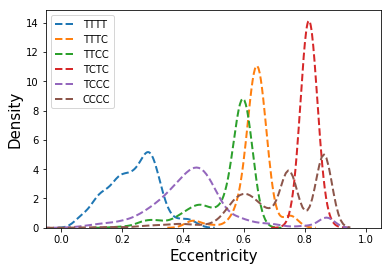

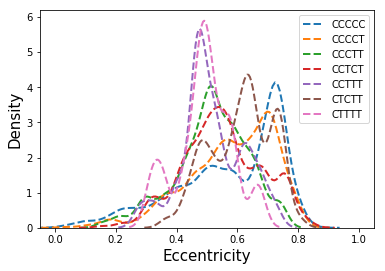

In [5]:
sns.kdeplot(TTTT["Eccentricity"],bw=0.025,label="TTTT",ls="--",lw=2)
sns.kdeplot(CTTT["Eccentricity"],bw=0.025,label="TTTC",ls="--",lw=2)
sns.kdeplot(CCTT["Eccentricity"],bw=0.025,label="TTCC",ls="--",lw=2)
sns.kdeplot(CTCT["Eccentricity"],bw=0.025,label="TCTC",ls="--",lw=2)
sns.kdeplot(CCCT["Eccentricity"],bw=0.025,label="TCCC",ls="--",lw=2)
sns.kdeplot(CCCC["Eccentricity"],bw=0.025,label="CCCC",ls="--",lw=2)
plt.xlim(-0.05,1.05)
plt.ylabel("Density",size=15)
plt.xlabel("Eccentricity",size=15)
plt.show()

sns.kdeplot(CCCCC["Eccentricity"],bw=0.025,label="CCCCC",ls="--",lw=2)
sns.kdeplot(CCCCT["Eccentricity"],bw=0.025,label="CCCCT",ls="--",lw=2)
sns.kdeplot(CCCTT["Eccentricity"],bw=0.025,label="CCCTT",ls="--",lw=2)
sns.kdeplot(CCTCT["Eccentricity"],bw=0.025,label="CCTCT",ls="--",lw=2)
sns.kdeplot(CCTTT["Eccentricity"],bw=0.025,label="CCTTT",ls="--",lw=2)
sns.kdeplot(CTCTT["Eccentricity"],bw=0.025,label="CTCTT",ls="--",lw=2)
sns.kdeplot(CTTTT["Eccentricity"],bw=0.025,label="CTTTT",ls="--",lw=2)
plt.xlim(-0.05,1.05)
plt.ylabel("Density",size=15)
plt.xlabel("Eccentricity",size=15)
plt.show()

# Effect of Amide Orientation (below or above mean plane)

In [6]:
cccc_dddd = CCCC[CCCC["UD"]=="DDDD"]
cccc_uddd = CCCC[CCCC["UD"]=="UDDD"]
cccc_udud = CCCC[CCCC["UD"]=="UDUD"]
cccc_uudd = CCCC[CCCC["UD"]=="UUDD"]

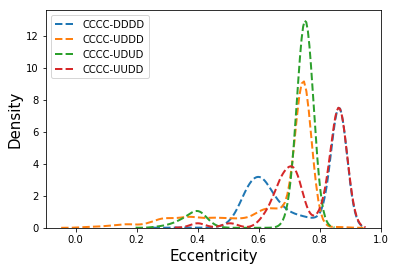

In [7]:
sns.kdeplot(cccc_dddd["Eccentricity"],bw=0.025,label="CCCC-DDDD",ls="--",lw=2)
sns.kdeplot(cccc_uddd["Eccentricity"],bw=0.025,label="CCCC-UDDD",ls="--",lw=2)
sns.kdeplot(cccc_udud["Eccentricity"],bw=0.025,label="CCCC-UDUD",ls="--",lw=2)
sns.kdeplot(cccc_uudd["Eccentricity"],bw=0.025,label="CCCC-UUDD",ls="--",lw=2)
plt.ylabel("Density",size=15)
plt.xlabel("Eccentricity",size=15)
plt.show()

# Effect of Formation of Intramolecular Interaction between Subtituents


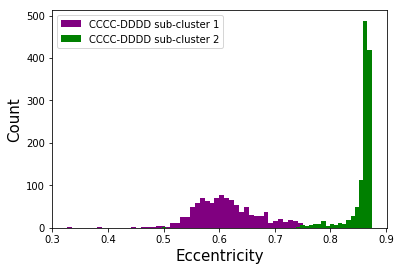

In [8]:
plt.hist(cccc_dddd[cccc_dddd["q2"]<0.9]["Eccentricity"],bins=50,color="purple",label="CCCC-DDDD sub-cluster 1")
plt.hist(cccc_dddd[cccc_dddd["q2"]>0.9]["Eccentricity"],bins=50,color="green",label="CCCC-DDDD sub-cluster 2")
plt.xlabel("Eccentricity",size=15)
plt.ylabel("Count",size=15)
plt.legend()
plt.show()

# Ramachandran Plot

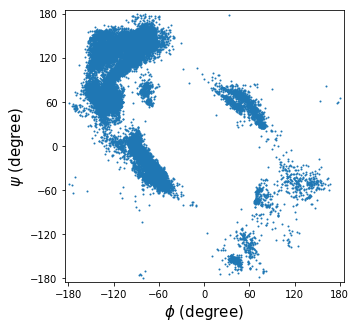

In [12]:
# Cyclic tetrapeptide
phi = pd.concat([ctp["EndoT1"],ctp["EndoT4"],ctp["EndoT7"],ctp["EndoT10"]],axis=0)
psi = pd.concat([ctp["EndoT0"],ctp["EndoT3"],ctp["EndoT6"],ctp["EndoT9"]],axis=0)
plt.figure(figsize=(5,5))
plt.scatter(phi*180/np.pi,psi*180/np.pi,s=1)
plt.xlim(-185,185)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.ylim(-185,185)
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\phi$ (degree)",size=15)
plt.ylabel(r"$\psi$ (degree)",size=15)
plt.show()

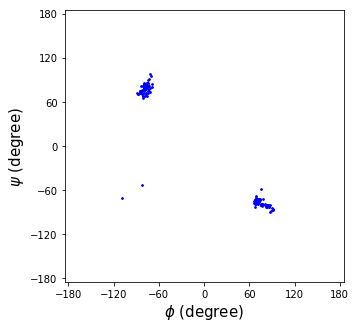

In [13]:
phi = pd.concat([ctp[ctp["CT"]=="TTTT"]["EndoT1"],ctp[ctp["CT"]=="TTTT"]["EndoT4"],ctp[ctp["CT"]=="TTTT"]["EndoT7"],ctp[ctp["CT"]=="TTTT"]["EndoT10"]],axis=0)
psi = pd.concat([ctp[ctp["CT"]=="TTTT"]["EndoT0"],ctp[ctp["CT"]=="TTTT"]["EndoT3"],ctp[ctp["CT"]=="TTTT"]["EndoT6"],ctp[ctp["CT"]=="TTTT"]["EndoT9"]],axis=0)
plt.figure(figsize=(5,5))
plt.scatter(phi*180/np.pi,psi*180/np.pi,s=3,color="b")
plt.xlim(-185,185)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.ylim(-185,185)
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\phi$ (degree)",size=15)
plt.ylabel(r"$\psi$ (degree)",size=15)
plt.show()

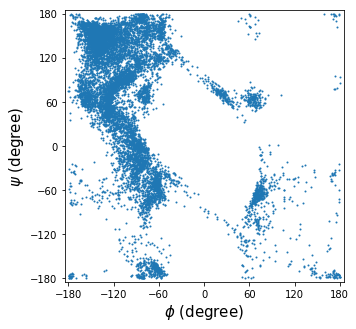

In [15]:
phi = pd.concat([cpp["EndoT1"],cpp["EndoT4"],cpp["EndoT7"],cpp["EndoT10"],cpp["EndoT13"]],axis=0)
psi = pd.concat([cpp["EndoT0"],cpp["EndoT3"],cpp["EndoT6"],cpp["EndoT9"],cpp["EndoT12"]],axis=0)
plt.figure(figsize=(5,5))
plt.scatter(phi*180/np.pi,psi*180/np.pi,s=1)
plt.xlim(-185,185)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.ylim(-185,185)
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel(r"$\phi$ (degree)",size=15)
plt.ylabel(r"$\psi$ (degree)",size=15)
plt.show()

# Puckering Amplitude  (CCCC-DDDD, CCCC-UDDD)  

# Effect of change in amide orientation on puckering preferences

Text(0, 0.5, 'Count')

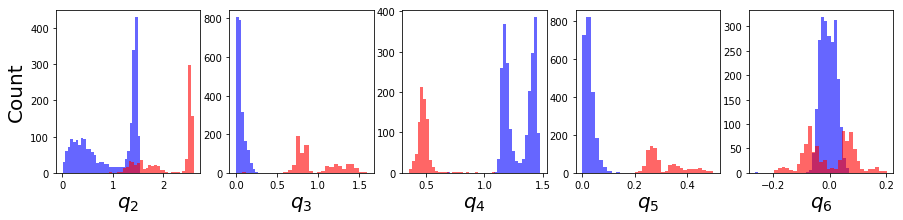

In [23]:
fig = plt.figure(figsize=(15,3))
gs = gridspec.GridSpec(nrows=1,ncols=5,wspace=0.2,hspace=0.1)
ax0_00 = fig.add_subplot(gs[0,0])
ax0_11 = fig.add_subplot(gs[0,1])
ax0_22 = fig.add_subplot(gs[0,2])
ax0_33 = fig.add_subplot(gs[0,3])
ax0_44 = fig.add_subplot(gs[0,4])

ax0_00.hist(cccc_dddd["q2"],bins=30,alpha=.6,color="blue") # DDDD
ax0_00.hist(cccc_uddd["q2"],bins=30,alpha=.6,color="red") # UDDD
ax0_11.hist(cccc_dddd["q3"],bins=30,alpha=.6,color="blue")
ax0_11.hist(cccc_uddd["q3"],bins=30,alpha=.6,color="red")
ax0_22.hist(cccc_dddd["q4"],bins=30,alpha=.6,color="blue")
ax0_22.hist(cccc_uddd["q4"],bins=30,alpha=.6,color="red")
ax0_33.hist(cccc_dddd["q5"],bins=30,alpha=.6,color="blue")
ax0_33.hist(cccc_uddd["q5"],bins=30,alpha=.6,color="red")
ax0_44.hist(cccc_dddd["q6"],bins=30,alpha=.6,color="blue")
ax0_44.hist(cccc_uddd["q6"],bins=30,alpha=.6,color="red")

ax0_00.set_xlabel(r"$q_{2}$", size=20)
ax0_11.set_xlabel(r"$q_{3}$", size=20)
ax0_22.set_xlabel(r"$q_{4}$", size=20)
ax0_33.set_xlabel(r"$q_{5}$", size=20)
ax0_44.set_xlabel(r"$q_{6}$", size=20)
ax0_00.set_ylabel("Count", size=20)


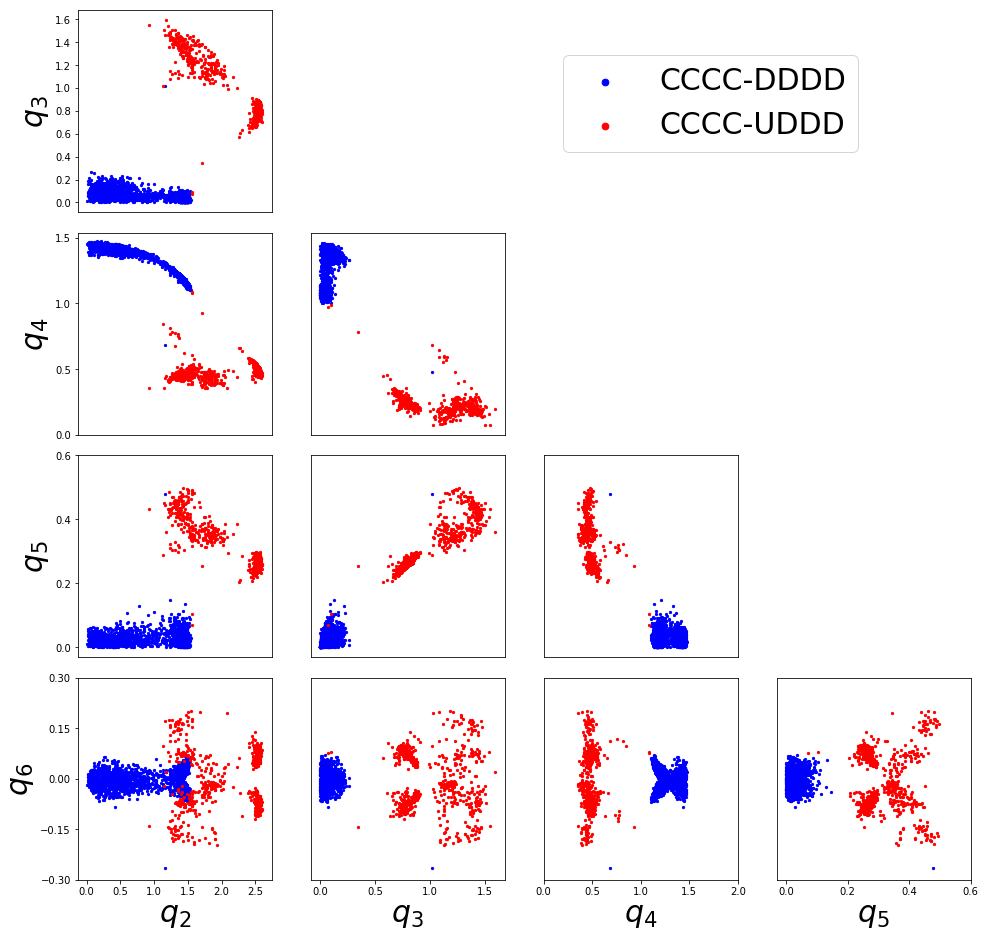

In [26]:
fig = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(nrows=4,ncols=4,wspace=0.2,hspace=0.1)
ax0_00 = fig.add_subplot(gs[0,0])
ax0_11 = fig.add_subplot(gs[1,1])
ax0_22 = fig.add_subplot(gs[2,2])
ax0_33 = fig.add_subplot(gs[3,3])

ax0_10 = fig.add_subplot(gs[1,0])
ax0_20 = fig.add_subplot(gs[2,0])
ax0_21 = fig.add_subplot(gs[2,1])
ax0_30 = fig.add_subplot(gs[3,0])
ax0_31 = fig.add_subplot(gs[3,1])
ax0_32 = fig.add_subplot(gs[3,2])

ax0_00.scatter(cccc_dddd["q2"],cccc_dddd["q3"],s=5, color="blue",label="CCCC-DDDD")
ax0_00.scatter(cccc_uddd["q2"],cccc_uddd["q3"],s=5, color="red",label="CCCC-UDDD")
ax0_10.scatter(cccc_dddd["q2"],cccc_dddd["q4"],s=5, color="blue")
ax0_10.scatter(cccc_uddd["q2"],cccc_uddd["q4"],s=5, color="red")
ax0_20.scatter(cccc_dddd["q2"],cccc_dddd["q5"],s=5, color="blue")
ax0_20.scatter(cccc_uddd["q2"],cccc_uddd["q5"],s=5, color="red")
ax0_30.scatter(cccc_dddd["q2"],cccc_dddd["q6"],s=5, color="blue")
ax0_30.scatter(cccc_uddd["q2"],cccc_uddd["q6"],s=5, color="red")

ax0_11.scatter(cccc_dddd["q3"],cccc_dddd["q4"],s=5, color="blue")
ax0_11.scatter(cccc_uddd["q3"],cccc_uddd["q4"],s=5, color="red")
ax0_21.scatter(cccc_dddd["q3"],cccc_dddd["q5"],s=5, color="blue")
ax0_21.scatter(cccc_uddd["q3"],cccc_uddd["q5"],s=5, color="red")
ax0_31.scatter(cccc_dddd["q3"],cccc_dddd["q6"],s=5, color="blue")
ax0_31.scatter(cccc_uddd["q3"],cccc_uddd["q6"],s=5, color="red")

ax0_22.scatter(cccc_dddd["q4"],cccc_dddd["q5"],s=5, color="blue")
ax0_22.scatter(cccc_uddd["q4"],cccc_uddd["q5"],s=5, color="red")
ax0_32.scatter(cccc_dddd["q4"],cccc_dddd["q6"],s=5, color="blue")
ax0_32.scatter(cccc_uddd["q4"],cccc_uddd["q6"],s=5, color="red")

ax0_33.scatter(cccc_dddd["q5"],cccc_dddd["q6"],s=5, color="blue")
ax0_33.scatter(cccc_uddd["q5"],cccc_uddd["q6"],s=5, color="red")

ax0_00.set_ylabel(r"$q_{3}$", size=30)
ax0_10.set_ylabel(r"$q_{4}$", size=30)
ax0_20.set_ylabel(r"$q_{5}$", size=30)
ax0_30.set_ylabel(r"$q_{6}$", size=30)

ax0_30.set_xlabel(r"$q_{2}$", size=30)
ax0_31.set_xlabel(r"$q_{3}$", size=30)
ax0_32.set_xlabel(r"$q_{4}$", size=30)
ax0_33.set_xlabel(r"$q_{5}$", size=30)

ax0_00.get_xaxis().set_visible(False)
ax0_10.get_xaxis().set_visible(False)
ax0_20.get_xaxis().set_visible(False)
ax0_11.get_xaxis().set_visible(False)
ax0_21.get_xaxis().set_visible(False)
ax0_22.get_xaxis().set_visible(False)


ax0_11.get_yaxis().set_visible(False)
ax0_21.get_yaxis().set_visible(False)
ax0_22.get_yaxis().set_visible(False)
ax0_31.get_yaxis().set_visible(False)
ax0_32.get_yaxis().set_visible(False)
ax0_33.get_yaxis().set_visible(False)

ax0_00.set_xticks([0,0.5,1,1.5,2,2.5])
ax0_10.set_xticks([0,0.5,1,1.5,2,2.5])
ax0_20.set_xticks([0,0.5,1,1.5,2,2.5])
ax0_30.set_xticks([0,0.5,1,1.5,2,2.5])

ax0_11.set_xticks([0,0.5,1,1.5])
ax0_21.set_xticks([0,0.5,1,1.5])
ax0_31.set_xticks([0,0.5,1,1.5])

ax0_22.set_xticks([0,0.5,1,1.5,2])
ax0_32.set_xticks([0,0.5,1,1.5,2])
ax0_33.set_xticks([0,0.2,0.4,0.6])

ax0_10.set_yticks([0,0.5,1,1.5])
ax0_20.set_yticks([0,0.2,0.4,0.6])
ax0_21.set_yticks([0,0.2,0.4,0.6])
ax0_22.set_yticks([0,0.2,0.4,0.6])
ax0_30.set_yticks([-0.3,-0.15,0,0.15,0.3])
ax0_31.set_yticks([-0.3,-0.15,0,0.15,0.3])
ax0_32.set_yticks([-0.3,-0.15,0,0.15,0.3])
ax0_33.set_yticks([-0.3,-0.15,0,0.15,0.3])
ax0_00.legend(loc=(2.5,0.3),fontsize=30,markerscale=3)
plt.show()

# Phase angle in CCCC-DDDD conformation

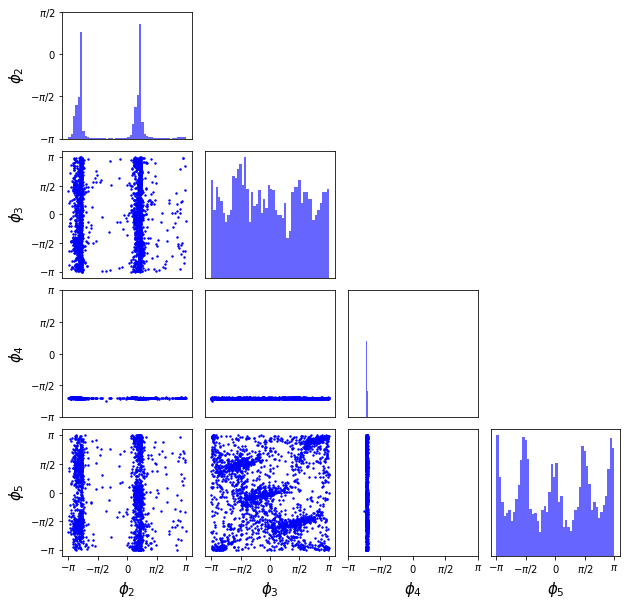

In [88]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=4,ncols=4,wspace=0.1,hspace=0.1)
ax0_00 = fig.add_subplot(gs[0,0])
ax0_11 = fig.add_subplot(gs[1,1])
ax0_22 = fig.add_subplot(gs[2,2])
ax0_10 = fig.add_subplot(gs[1,0])
ax0_20 = fig.add_subplot(gs[2,0])
ax0_21 = fig.add_subplot(gs[2,1])
ax0_30 = fig.add_subplot(gs[3,0])
ax0_31 = fig.add_subplot(gs[3,1])
ax0_32 = fig.add_subplot(gs[3,2])
ax0_33 = fig.add_subplot(gs[3,3])

ax0_00.hist(cccc_dddd["phi2"],bins=50,alpha=.6,color="b")
ax0_11.hist(cccc_dddd["phi3"],bins=50,alpha=.6,color="b")
ax0_22.hist(cccc_dddd["phi4"],bins=50,alpha=.6,color="b")
ax0_33.hist(cccc_dddd["phi5"],bins=50,alpha=.6,color="b")

ax0_10.scatter(cccc_dddd["phi2"],cccc_dddd["phi3"],s=2, color="b")
ax0_20.scatter(cccc_dddd["phi2"],cccc_dddd["phi4"],s=2, color="b")
ax0_30.scatter(cccc_dddd["phi2"],cccc_dddd["phi5"],s=2, color="b")
ax0_21.scatter(cccc_dddd["phi3"],cccc_dddd["phi4"],s=2, color="b")
ax0_31.scatter(cccc_dddd["phi3"],cccc_dddd["phi5"],s=2, color="b")
ax0_32.scatter(cccc_dddd["phi4"],cccc_dddd["phi5"],s=2, color="b")

ax0_00.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_10.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_20.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_30.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_11.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_21.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_31.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_22.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_32.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_33.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

ax0_00.set_yticks([0,200,400,600])
ax0_10.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_20.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_30.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_21.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_31.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_32.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

ax0_00.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_10.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_20.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_30.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_30.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_31.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_32.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_33.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])

ax0_00.set_ylabel(r"$\phi_{2}$", size=15)
ax0_10.set_ylabel(r"$\phi_{3}$", size=15)
ax0_20.set_ylabel(r"$\phi_{4}$", size=15)
ax0_30.set_ylabel(r"$\phi_{5}$", size=15)
ax0_30.set_xlabel(r"$\phi_{2}$", size=15)
ax0_31.set_xlabel(r"$\phi_{3}$", size=15)
ax0_32.set_xlabel(r"$\phi_{4}$", size=15)
ax0_33.set_xlabel(r"$\phi_{5}$", size=15)

ax0_00.get_xaxis().set_visible(False)
ax0_10.get_xaxis().set_visible(False)
ax0_11.get_xaxis().set_visible(False)
ax0_20.get_xaxis().set_visible(False)
ax0_21.get_xaxis().set_visible(False)
ax0_22.get_xaxis().set_visible(False)
ax0_11.get_yaxis().set_visible(False)
ax0_21.get_yaxis().set_visible(False)
ax0_22.get_yaxis().set_visible(False)
ax0_31.get_yaxis().set_visible(False)
ax0_32.get_yaxis().set_visible(False)
ax0_33.get_yaxis().set_visible(False)


# Phase Angle in CCCC-UDDD conformations

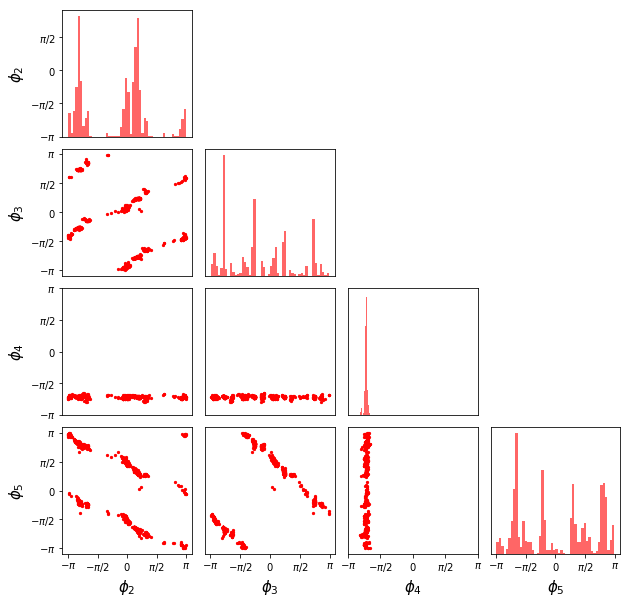

In [89]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=4,ncols=4,wspace=0.1,hspace=0.1)
ax0_00 = fig.add_subplot(gs[0,0])
ax0_11 = fig.add_subplot(gs[1,1])
ax0_22 = fig.add_subplot(gs[2,2])
ax0_10 = fig.add_subplot(gs[1,0])
ax0_20 = fig.add_subplot(gs[2,0])
ax0_21 = fig.add_subplot(gs[2,1])
ax0_30 = fig.add_subplot(gs[3,0])
ax0_31 = fig.add_subplot(gs[3,1])
ax0_32 = fig.add_subplot(gs[3,2])
ax0_33 = fig.add_subplot(gs[3,3])

ax0_00.hist(cccc_uddd["phi2"],bins=50,alpha=.6,color="red")
ax0_11.hist(cccc_uddd["phi3"],bins=50,alpha=.6,color="red")
ax0_22.hist(cccc_uddd["phi4"],bins=50,alpha=.6,color="red")
ax0_33.hist(cccc_uddd["phi5"],bins=50,alpha=.6,color="red")

ax0_10.scatter(cccc_uddd["phi2"],cccc_uddd["phi3"],s=5, color="red")
ax0_20.scatter(cccc_uddd["phi2"],cccc_uddd["phi4"],s=5, color="red")
ax0_30.scatter(cccc_uddd["phi2"],cccc_uddd["phi5"],s=5, color="red")
ax0_21.scatter(cccc_uddd["phi3"],cccc_uddd["phi4"],s=5, color="red")
ax0_31.scatter(cccc_uddd["phi3"],cccc_uddd["phi5"],s=5, color="red")
ax0_32.scatter(cccc_uddd["phi4"],cccc_uddd["phi5"],s=5, color="red")


ax0_00.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_10.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_20.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_30.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_11.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_21.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_31.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_22.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_32.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_33.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

ax0_00.set_yticks([0,30,60,90])
ax0_10.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_20.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_30.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_21.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_31.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax0_32.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

ax0_00.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_10.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_20.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_30.set_yticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_30.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_31.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_32.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])
ax0_33.set_xticklabels([r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$", r"$\pi$"])

ax0_00.set_ylabel(r"$\phi_{2}$", size=15)
ax0_10.set_ylabel(r"$\phi_{3}$", size=15)
ax0_20.set_ylabel(r"$\phi_{4}$", size=15)
ax0_30.set_ylabel(r"$\phi_{5}$", size=15)
ax0_30.set_xlabel(r"$\phi_{2}$", size=15)
ax0_31.set_xlabel(r"$\phi_{3}$", size=15)
ax0_32.set_xlabel(r"$\phi_{4}$", size=15)
ax0_33.set_xlabel(r"$\phi_{5}$", size=15)

ax0_00.get_xaxis().set_visible(False)
ax0_10.get_xaxis().set_visible(False)
ax0_11.get_xaxis().set_visible(False)
ax0_20.get_xaxis().set_visible(False)
ax0_21.get_xaxis().set_visible(False)
ax0_22.get_xaxis().set_visible(False)
ax0_11.get_yaxis().set_visible(False)
ax0_21.get_yaxis().set_visible(False)
ax0_22.get_yaxis().set_visible(False)
ax0_31.get_yaxis().set_visible(False)
ax0_32.get_yaxis().set_visible(False)
ax0_33.get_yaxis().set_visible(False)


# Substituent Orientation Angle

In [49]:
def PlotOrientationAngles(data,column, angletype, figname): # only for cyclic tetrapeptide
    fig = plt.figure(figsize=(10,10))
    gs = gridspec.GridSpec(nrows=4,ncols=4,wspace=0.1,hspace=0.1)
    ax0_00 = fig.add_subplot(gs[0,0])
    ax0_11 = fig.add_subplot(gs[1,1])
    ax0_22 = fig.add_subplot(gs[2,2])
    ax0_10 = fig.add_subplot(gs[1,0])
    ax0_20 = fig.add_subplot(gs[2,0])
    ax0_21 = fig.add_subplot(gs[2,1])
    ax0_30 = fig.add_subplot(gs[3,0])
    ax0_31 = fig.add_subplot(gs[3,1])
    ax0_32 = fig.add_subplot(gs[3,2])
    ax0_33 = fig.add_subplot(gs[3,3])
    ax0_00.hist(data[column[0]],bins=50,alpha=.6,color="b")
    a,b, _ = ax0_00.hist(data[column[0]],bins=50,alpha=.6,color="b")
    ymax = a.max()
    ax0_11.hist(data[column[1]],bins=50,alpha=.6,color="b")
    ax0_22.hist(data[column[2]],bins=50,alpha=.6,color="b")
    ax0_33.hist(data[column[3]],bins=50,alpha=.6,color="b")    
    ax0_10.scatter(data[column[0]],data[column[1]],s=2, color="b")
    ax0_20.scatter(data[column[0]],data[column[2]],s=2, color="b")
    ax0_30.scatter(data[column[0]],data[column[3]],s=2, color="b")
    ax0_21.scatter(data[column[1]],data[column[2]],s=2, color="b")
    ax0_31.scatter(data[column[1]],data[column[3]],s=2, color="b")
    ax0_32.scatter(data[column[2]],data[column[3]],s=2, color="b")
    if angletype=="alpha":
        ax0_00.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_10.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_20.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_30.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_11.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_21.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_31.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_22.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_32.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_33.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])

        ax0_00.set_yticks([0,(ymax+1)/4,2*(ymax+1)/4,3*(ymax+1)/4,ymax+1])
        ax0_10.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_20.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_30.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_21.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_31.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])
        ax0_32.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi])

        ax0_00.set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_10.set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_20.set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_30.set_yticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_30.set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_31.set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_32.set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])
        ax0_33.set_xticklabels(["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$", r"$\pi$"])


        ax0_00.set_ylabel(r"$\alpha_{1}$", size=15)
        ax0_10.set_ylabel(r"$\alpha_{2}$", size=15)
        ax0_20.set_ylabel(r"$\alpha_{3}$", size=15)
        ax0_30.set_ylabel(r"$\alpha_{4}$", size=15)
        ax0_30.set_xlabel(r"$\alpha_{1}$", size=15)
        ax0_31.set_xlabel(r"$\alpha_{2}$", size=15)
        ax0_32.set_xlabel(r"$\alpha_{3}$", size=15)
        ax0_33.set_xlabel(r"$\alpha_{4}$", size=15)
    elif angletype=="beta":
        ax0_00.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_10.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_20.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_30.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_11.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_21.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_31.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_22.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_32.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_33.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

        ax0_00.set_yticks([0,(ymax+1)/4,2*(ymax+1)/4,3*(ymax+1)/4,(ymax+1)])
        ax0_10.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_20.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_30.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_21.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_31.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
        ax0_32.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])

        ax0_00.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_10.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_20.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_30.set_yticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_30.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_31.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_32.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_33.set_xticklabels([r"$-\pi$",r"$-\pi/2$","0",r"$\pi/2$", r"$\pi$"])
        ax0_00.set_ylabel(r"$\beta_{1}$", size=15)
        ax0_10.set_ylabel(r"$\beta_{2}$", size=15)
        ax0_20.set_ylabel(r"$\beta_{3}$", size=15)
        ax0_30.set_ylabel(r"$\beta_{4}$", size=15)
        ax0_30.set_xlabel(r"$\beta_{1}$", size=15)
        ax0_31.set_xlabel(r"$\beta_{2}$", size=15)
        ax0_32.set_xlabel(r"$\beta_{3}$", size=15)
        ax0_33.set_xlabel(r"$\beta_{4}$", size=15)
    else:
        raise "angle type alpha/beta"
    ax0_00.get_xaxis().set_visible(False)
    ax0_10.get_xaxis().set_visible(False)
    ax0_11.get_xaxis().set_visible(False)
    ax0_20.get_xaxis().set_visible(False)
    ax0_21.get_xaxis().set_visible(False)
    ax0_22.get_xaxis().set_visible(False)
    ax0_11.get_yaxis().set_visible(False)
    ax0_21.get_yaxis().set_visible(False)
    ax0_22.get_yaxis().set_visible(False)
    ax0_31.get_yaxis().set_visible(False)
    ax0_32.get_yaxis().set_visible(False)
    ax0_33.get_yaxis().set_visible(False)
    if figname:
        plt.savefig(figname,dpi=150,bbox_inches="tight")

# CCCC-DDDD Amide Carbonyl $\alpha$ orientation angle

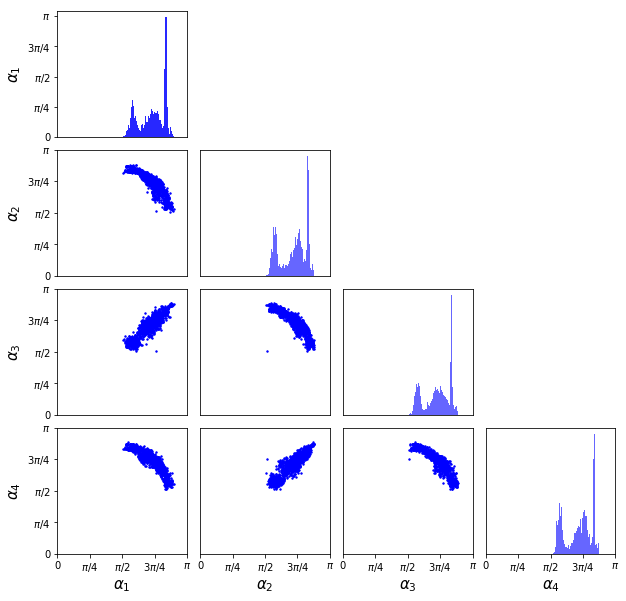

In [47]:
PlotOrientationAngles(cccc_dddd,["COAlpha0","COAlpha1","COAlpha2","COAlpha3"],angletype="alpha",figname=None)

# CCCC-DDDD Amide Carbonyl $\beta$ orientation angle

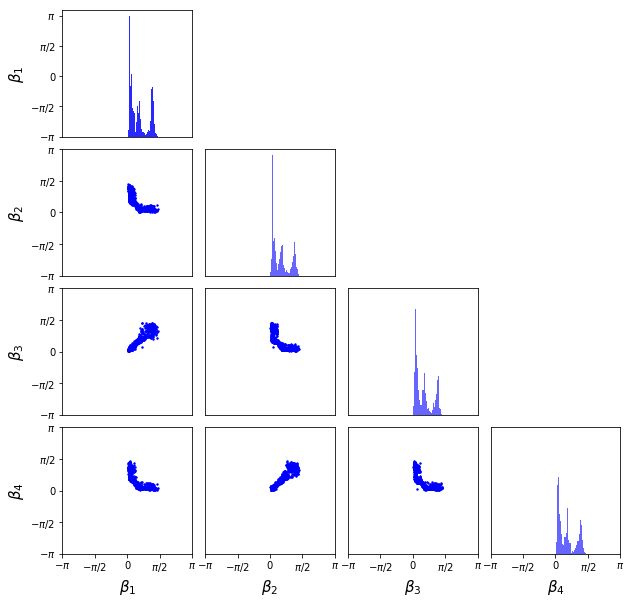

In [48]:
PlotOrientationAngles(cccc_dddd,["COBeta0","COBeta1","COBeta2","COBeta3"],angletype="beta",figname=None)

# CCCC-DDDD $C_{\beta}$ $\alpha$ orientation angle

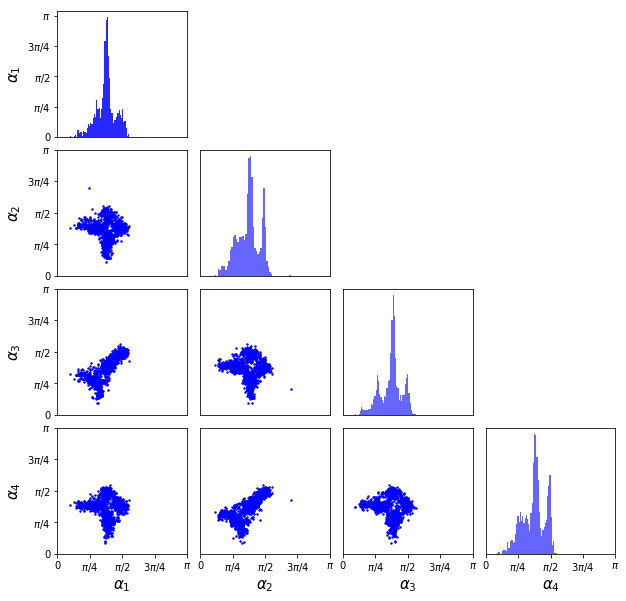

In [53]:
cccc_dddd_subset = cccc_dddd[["CbetaAlpha0","CbetaAlpha1","CbetaAlpha2","CbetaAlpha3","CbetaBeta0","CbetaBeta1","CbetaBeta2","CbetaBeta3"]].dropna()
PlotOrientationAngles(cccc_dddd_subset,["CbetaAlpha0","CbetaAlpha1","CbetaAlpha2","CbetaAlpha3"],angletype="alpha",figname=None)

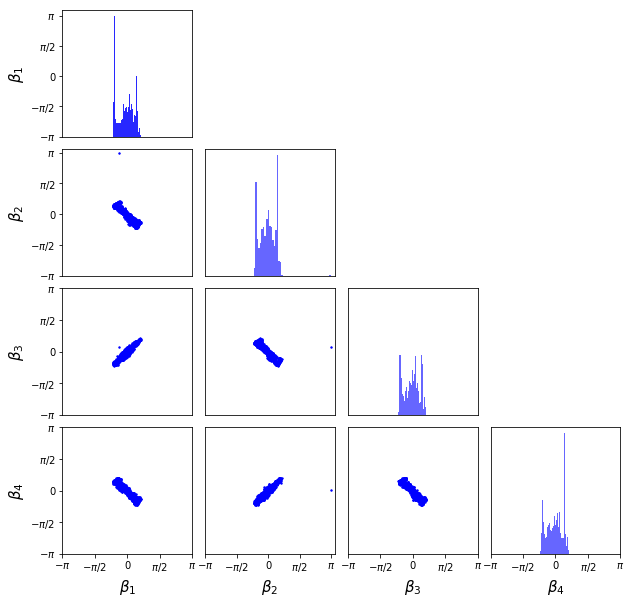

In [54]:
PlotOrientationAngles(cccc_dddd_subset,["CbetaBeta0","CbetaBeta1","CbetaBeta2","CbetaBeta3"],angletype="beta",figname=None)